In [65]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

In [66]:
def riqi_2_year_month(df, col='日期'):
    '''
    get year month & day
    '''
    # df[col] = pd.to_datetime(df[col])
    # df['年'] = df[col].dt.year
    # df['月'] = df[col].dt.month
    # df['日'] = df[col].dt.day
    return df



def fill_missing_dates(df, date_col='日期'):
    """
    Ensure that the dates in the DataFrame are continuous by adding missing dates.
    Missing values are filled using the last observed non-missing value.
    The input DataFrame's structure is preserved (no index changes).

    Parameters:
    - df: pandas DataFrame containing the data.
    - date_col: str, the name of the date column (default is '日期').

    Returns:
    - pandas DataFrame with continuous dates and filled missing values.
    """
    
    # Convert the date column to datetime
    df[date_col] = pd.to_datetime(df[date_col])
    
    # Create a date range from the minimum to the maximum date in the DataFrame
    date_range = pd.date_range(start=df[date_col].min(), end=df[date_col].max(), freq='D')
    
    # Create a new DataFrame with the full date range
    full_df = pd.DataFrame({date_col: date_range})
    
    # Merge the original DataFrame with the full date range DataFrame
    merged_df = pd.merge(full_df, df, on=date_col, how='left')
    
    # Forward fill the missing values
    merged_df.ffill(inplace=True)
    
    return merged_df


import pandas as pd

def keep_average_if_identical(df):
    """
    If the "最高", "最低", and "平均" columns in the DataFrame are identical,
    keep only the "平均" column.

    Parameters:
    - df: pandas DataFrame containing the data.

    Returns:
    - pandas DataFrame with only the "平均" column if the three columns are identical,
      otherwise returns the original DataFrame.
    """
    
    # Check if the "最高", "最低", and "平均" columns are identical
    if all(df['最高'] == df['最低']) and all(df['最低'] == df['平均']):
        # Drop the "最高" and "最低" columns
        df = df.drop(columns=['最高', '最低'])
    
    return df



import pandas as pd

def add_previous_days_features(df1, df2, prefix='prefix', shift_days=3, include_0 = True):
    """
    For each row in df1, add the "最高", "最低", and "平均" values from df2 for the previous 7 days.
    The new columns will be named in the format prefix_day_xx, where xx is the number of days before the current date.
    If some of the columns ("最高", "最低", "平均") are missing in df2, only the available columns are processed.

    Parameters:
    - df1: pandas DataFrame containing the main data.
    - df2: pandas DataFrame containing the features to be added.
    - prefix: str, the prefix for the new column names (default is 'prefix').
    - shift_days: int, the number of previous days to consider (default is 7).

    Returns:
    - pandas DataFrame with the new columns added.
    """
    
    # Ensure the "日期" column is in datetime format
    df1['日期'] = pd.to_datetime(df1['日期'])
    df2['日期'] = pd.to_datetime(df2['日期'])
    
    # Create a copy of df1 to avoid modifying the original DataFrame
    result_df = df1.copy()
    
    # Check which columns are available in df2
    available_columns = [col for col in ['最高', '最低', '平均'] if col in df2.columns]
    
    # Iterate over the previous shift_days days
    if include_0:
        start = 0 
    else:
        start = 1

    for i in range(start, shift_days+1):
        # Shift df2 by i days to get the previous days' data
        shifted_df = df2[available_columns].shift(i)
        shifted_df['日期'] = df2['日期']
        
        # Merge the shifted data with df1 on the "日期" column
        merged_df = pd.merge(result_df, shifted_df, on='日期', how='left', suffixes=('', f'_{i}'))
        
        # Rename the columns to the desired format
        for col in available_columns:
            merged_df.rename(columns={f'{col}_{i}': f'{prefix}_{i}_{col}'}, inplace=True)
        
        # Update the result_df with the new columns
        result_df = merged_df
    
    return result_df

In [67]:
df = pd.read_excel('./PPData/1-华东市场PP粒市场价_法定工作日.xlsx')
df = df.loc[:,['日期','最低','最高','平均','同比','环比']]
# df = fill_missing_dates(df)
df = keep_average_if_identical(df)
df1 = riqi_2_year_month(df=df, col='日期')
df1.head()

,日期,最低,最高,平均,同比,环比
0,2014-12-01,10200.0,10300.0,10250.0,NaN,NaN
1,2014-12-02,10150.0,10250.0,10200.0,NaN,-0.49%
2,2014-12-03,10050.0,10150.0,10100.0,NaN,-0.98%
3,2014-12-04,9900.0,10000.0,9950.0,NaN,-1.49%
4,2014-12-05,9750.0,9850.0,9800.0,NaN,-1.51%


In [68]:
df = pd.read_excel('./PPData/2-中国PP月度产量.xlsx')
df = df.loc[:,['日期','最低','最高','平均','同比','环比']]
df = fill_missing_dates(df)
df = keep_average_if_identical(df)
df2 = riqi_2_year_month(df=df, col='日期')
df2.head()

,日期,平均,同比,环比
0,2014-01-31,1138.6,NaN,NaN
1,2014-02-01,1138.6,NaN,NaN
2,2014-02-02,1138.6,NaN,NaN
3,2014-02-03,1138.6,NaN,NaN
4,2014-02-04,1138.6,NaN,NaN


In [69]:
df = pd.read_excel('./PPData/3-塑编行业周度开工率.xlsx')
df = df.loc[:,['日期','最低','最高','平均','同比','环比']]
df = fill_missing_dates(df)
df = keep_average_if_identical(df)
df3 = riqi_2_year_month(df=df, col='日期')
df3.head()

,日期,平均,同比,环比
0,2011-01-07,75.0,NaN,NaN
1,2011-01-08,75.0,NaN,NaN
2,2011-01-09,75.0,NaN,NaN
3,2011-01-10,75.0,NaN,NaN
4,2011-01-11,75.0,NaN,NaN


In [70]:
df = pd.read_excel('./PPData/4-PP拉丝级生产比例日度数据.xlsx')
print(df.columns)
df = df.loc[:,['日期','最低','最高','平均','同比','环比']]
df = fill_missing_dates(df)
df = keep_average_if_identical(df)
df4 = riqi_2_year_month(df=df, col='日期')
df4.head()

Index(['DIID', '数据项名称', '产品名称', '企业名称', '区域名称', '市场名称', '更新周期', '规格型号', '数据类型',
       '单位', '日期', '最低', '最高', '平均', '同比', '环比', '备注'],
      dtype='object')


,日期,平均,同比,环比
0,2014-01-02,35.51,NaN,NaN
1,2014-01-03,37.08,NaN,4.42%
2,2014-01-04,37.08,NaN,4.42%
3,2014-01-05,37.08,NaN,4.42%
4,2014-01-06,38.41,NaN,3.59%


In [71]:
df = pd.read_excel('./PPData/5-PP进口量月度数据_滞后一月更新.xlsx')
print(df.columns)
df = df.loc[:,['日期','最低','最高','平均','同比','环比']]
df = fill_missing_dates(df)
df = keep_average_if_identical(df)
df5 = riqi_2_year_month(df=df, col='日期')
df5.head()

Index(['DIID', '数据项名称', '产品名称', '企业名称', '区域名称', '市场名称', '更新周期', '规格型号', '数据类型',
       '单位', '日期', '最低', '最高', '平均', '同比', '环比', '备注'],
      dtype='object')


,日期,平均,同比,环比
0,2010-01-31,337.52,44.40%,-9.67%
1,2010-02-01,337.52,44.40%,-9.67%
2,2010-02-02,337.52,44.40%,-9.67%
3,2010-02-03,337.52,44.40%,-9.67%
4,2010-02-04,337.52,44.40%,-9.67%


In [72]:
df = pd.read_excel('./PPData/6-PP注塑制品周度开工率.xlsx')
print(df.columns)
df = df.loc[:,['日期','最低','最高','平均','同比','环比']]
df = fill_missing_dates(df)
df = keep_average_if_identical(df)
df6 = riqi_2_year_month(df=df, col='日期')
df6.head()

Index(['DIID', '数据项名称', '产品名称', '企业名称', '区域名称', '市场名称', '更新周期', '规格型号', '数据类型',
       '单位', '日期', '最低', '最高', '平均', '同比', '环比', '备注'],
      dtype='object')


,日期,平均,同比,环比
0,2014-01-03,62.0,NaN,NaN
1,2014-01-04,62.0,NaN,NaN
2,2014-01-05,62.0,NaN,NaN
3,2014-01-06,62.0,NaN,NaN
4,2014-01-07,62.0,NaN,NaN


In [73]:
df = pd.read_excel('./PPData/7-BOPP月度开工率.xlsx')
print(df.columns)
df = df.loc[:,['日期','最低','最高','平均','同比','环比']]
df = fill_missing_dates(df)
df = keep_average_if_identical(df)
df7 = riqi_2_year_month(df=df, col='日期')
df7.head()

Index(['DIID', '数据项名称', '产品名称', '企业名称', '区域名称', '市场名称', '更新周期', '规格型号', '数据类型',
       '单位', '日期', '年', '月', '最低', '最高', '平均', '同比', '环比', '备注'],
      dtype='object')


,日期,平均,同比,环比
0,2010-01-01,87.31,NaN,NaN
1,2010-01-02,87.31,NaN,NaN
2,2010-01-03,87.31,NaN,NaN
3,2010-01-04,87.31,NaN,NaN
4,2010-01-05,87.31,NaN,NaN


In [74]:
df = pd.read_excel('./PPData/8-PDH生产路线日度含税成本.xlsx')
print(df.columns)
df = df.loc[:,['日期','最低','最高','平均','同比','环比']]
df = fill_missing_dates(df)
df = keep_average_if_identical(df)
df8 = riqi_2_year_month(df=df, col='日期')
df8.head()

Index(['DIID', '数据项名称', '产品名称', '企业名称', '区域名称', '市场名称', '更新周期', '规格型号', '数据类型',
       '单位', '日期', '最低', '最高', '平均', '同比', '环比', '备注'],
      dtype='object')


,日期,平均,同比,环比
0,2019-02-13,6771.99,NaN,NaN
1,2019-02-14,6926.38,NaN,2.28%
2,2019-02-15,6824.66,NaN,-1.47%
3,2019-02-16,6824.66,NaN,-1.47%
4,2019-02-17,6824.66,NaN,-1.47%


In [75]:
df = pd.read_excel('./PPData/9-乙烯裂解生产路线日度含税成本.xlsx')
print(df.columns)
df = df.loc[:,['日期','最低','最高','平均','同比','环比']]
df = fill_missing_dates(df)
df = keep_average_if_identical(df)
df9 = riqi_2_year_month(df=df, col='日期')
df9.head()

Index(['DIID', '数据项名称', '产品名称', '企业名称', '区域名称', '市场名称', '更新周期', '规格型号', '数据类型',
       '单位', '日期', '最低', '最高', '平均', '同比', '环比', '备注'],
      dtype='object')


,日期,平均,同比,环比
0,2014-12-31,6051.84,NaN,NaN
1,2015-01-01,6051.84,NaN,NaN
2,2015-01-02,6051.84,NaN,NaN
3,2015-01-03,6051.84,NaN,NaN
4,2015-01-04,5987.64,NaN,-1.06%


In [76]:
df = pd.read_excel('./PPData/10-MTO生产路线日度含税成本.xlsx')
print(df.columns)
df = df.loc[:,['日期','最低','最高','平均','同比','环比']]
df = fill_missing_dates(df)
df = keep_average_if_identical(df)
df10 = riqi_2_year_month(df=df, col='日期')
df10.head()

Index(['DIID', '数据项名称', '产品名称', '企业名称', '区域名称', '市场名称', '更新周期', '规格型号', '数据类型',
       '单位', '日期', '最低', '最高', '平均', '同比', '环比', '备注'],
      dtype='object')


,日期,平均,同比,环比
0,2016-01-04,5500.0,NaN,NaN
1,2016-01-05,5560.0,NaN,1.09%
2,2016-01-06,5560.0,NaN,0.00%
3,2016-01-07,5560.0,NaN,0.00%
4,2016-01-08,5590.0,NaN,0.54%


In [77]:
df = pd.read_excel('./PPData/11-CTO生产路线日度含税成本.xlsx')
print(df.columns)
df = df.loc[:,['日期','最低','最高','平均','同比','环比']]
df = fill_missing_dates(df)
df = keep_average_if_identical(df)
df11 = riqi_2_year_month(df=df, col='日期')
df11.head()

Index(['DIID', '数据项名称', '产品名称', '企业名称', '区域名称', '市场名称', '更新周期', '规格型号', '数据类型',
       '单位', '日期', '最低', '最高', '平均', '同比', '环比', '备注'],
      dtype='object')


,日期,平均,同比,环比
0,2015-01-04,4810.75,NaN,NaN
1,2015-01-05,4810.75,NaN,0.00%
2,2015-01-06,4810.75,NaN,0.00%
3,2015-01-07,4810.75,NaN,0.00%
4,2015-01-08,4810.75,NaN,0.00%


In [78]:
df = pd.read_excel('./PPData/12-外采丙烯生产路线日度含税成本.xlsx')
print(df.columns)
df = df.loc[:,['日期','最低','最高','平均','同比','环比']]
df = fill_missing_dates(df)
df = keep_average_if_identical(df)
df12 = riqi_2_year_month(df=df, col='日期')
df12.head()

Index(['DIID', '数据项名称', '产品名称', '企业名称', '区域名称', '市场名称', '更新周期', '规格型号', '数据类型',
       '单位', '日期', '最低', '最高', '平均', '同比', '环比', '备注'],
      dtype='object')


,日期,平均,同比,环比
0,2011-01-04,11253.5,NaN,NaN
1,2011-01-05,11253.5,NaN,0.00%
2,2011-01-06,11253.5,NaN,0.00%
3,2011-01-07,11253.5,NaN,0.00%
4,2011-01-08,11253.5,NaN,0.00%


In [79]:
df = pd.read_excel('./PPData/13-大商所PP期货价格_短数据.xlsx')
print(df.columns)
df = df.loc[:,['日期','最低','最高','平均','同比','环比']]
df = fill_missing_dates(df)
df = keep_average_if_identical(df)
df13 = riqi_2_year_month(df=df, col='日期')
df13.head()

Index(['DIID', '数据项名称', '产品名称', '企业名称', '区域名称', '市场名称', '更新周期', '规格型号', '数据类型',
       '单位', '日期', '最低', '最高', '平均', '同比', '环比', '备注'],
      dtype='object')


,日期,平均,同比,环比
0,2019-10-28,8028.0,NaN,NaN
1,2019-10-29,7973.0,NaN,-0.69%
2,2019-10-30,7975.0,NaN,0.03%
3,2019-10-31,7944.0,NaN,-0.39%
4,2019-11-01,7965.0,NaN,0.26%


In [80]:
df = pd.read_excel('./PPData/14-PP月度检修实际损失量.xlsx')
print(df.columns)
df = df.loc[:,['日期','最低','最高','平均','同比','环比']]
df = fill_missing_dates(df)
df = keep_average_if_identical(df)
df14 = riqi_2_year_month(df=df, col='日期')
df14.head()

Index(['DIID', '数据项名称', '产品名称', '企业名称', '区域名称', '市场名称', '更新周期', '规格型号', '数据类型',
       '单位', '日期', '最低', '最高', '平均', '同比', '环比', '备注'],
      dtype='object')

,日期,平均,同比,环比
0,2018-01-31,180.0,NaN,NaN
1,2018-02-01,180.0,NaN,NaN
2,2018-02-02,180.0,NaN,NaN
3,2018-02-03,180.0,NaN,NaN
4,2018-02-04,180.0,NaN,NaN


In [81]:
df = pd.read_excel('./PPData/15-pp石化库存_每3个工作日更新.xlsx')
df = fill_missing_dates(df, date_col='date')
df15 = riqi_2_year_month(df=df, col='date')
df15.rename(columns={'date':'日期', 'inventory':'平均'},inplace=True)
df15.head()

,日期,平均
0,2011-01-16,53.8
1,2011-01-17,53.8
2,2011-01-18,53.8
3,2011-01-19,55.7
4,2011-01-20,55.7


# 0阶特征偏移

In [82]:
df_merge = df1.copy()

df_list = [df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15]

# 特征偏移
i = 2
for df in df_list:
    df_merge = add_previous_days_features(df_merge, df, prefix=f'df{i}', shift_days=0)
    i += 1

# 价格偏移
df_merge = add_previous_days_features(df_merge, df1.loc[:,['日期','平均']], prefix='df1', shift_days=0, include_0=False)

C:\Users\simonpan\AppData\Local\Temp\ipykernel_6916\1365781785.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned = df_cleaned.loc[df_cleaned['日期'] < '2021-06-01',:].fillna(method='ffill').fillna(method='bfill')


<Axes: >

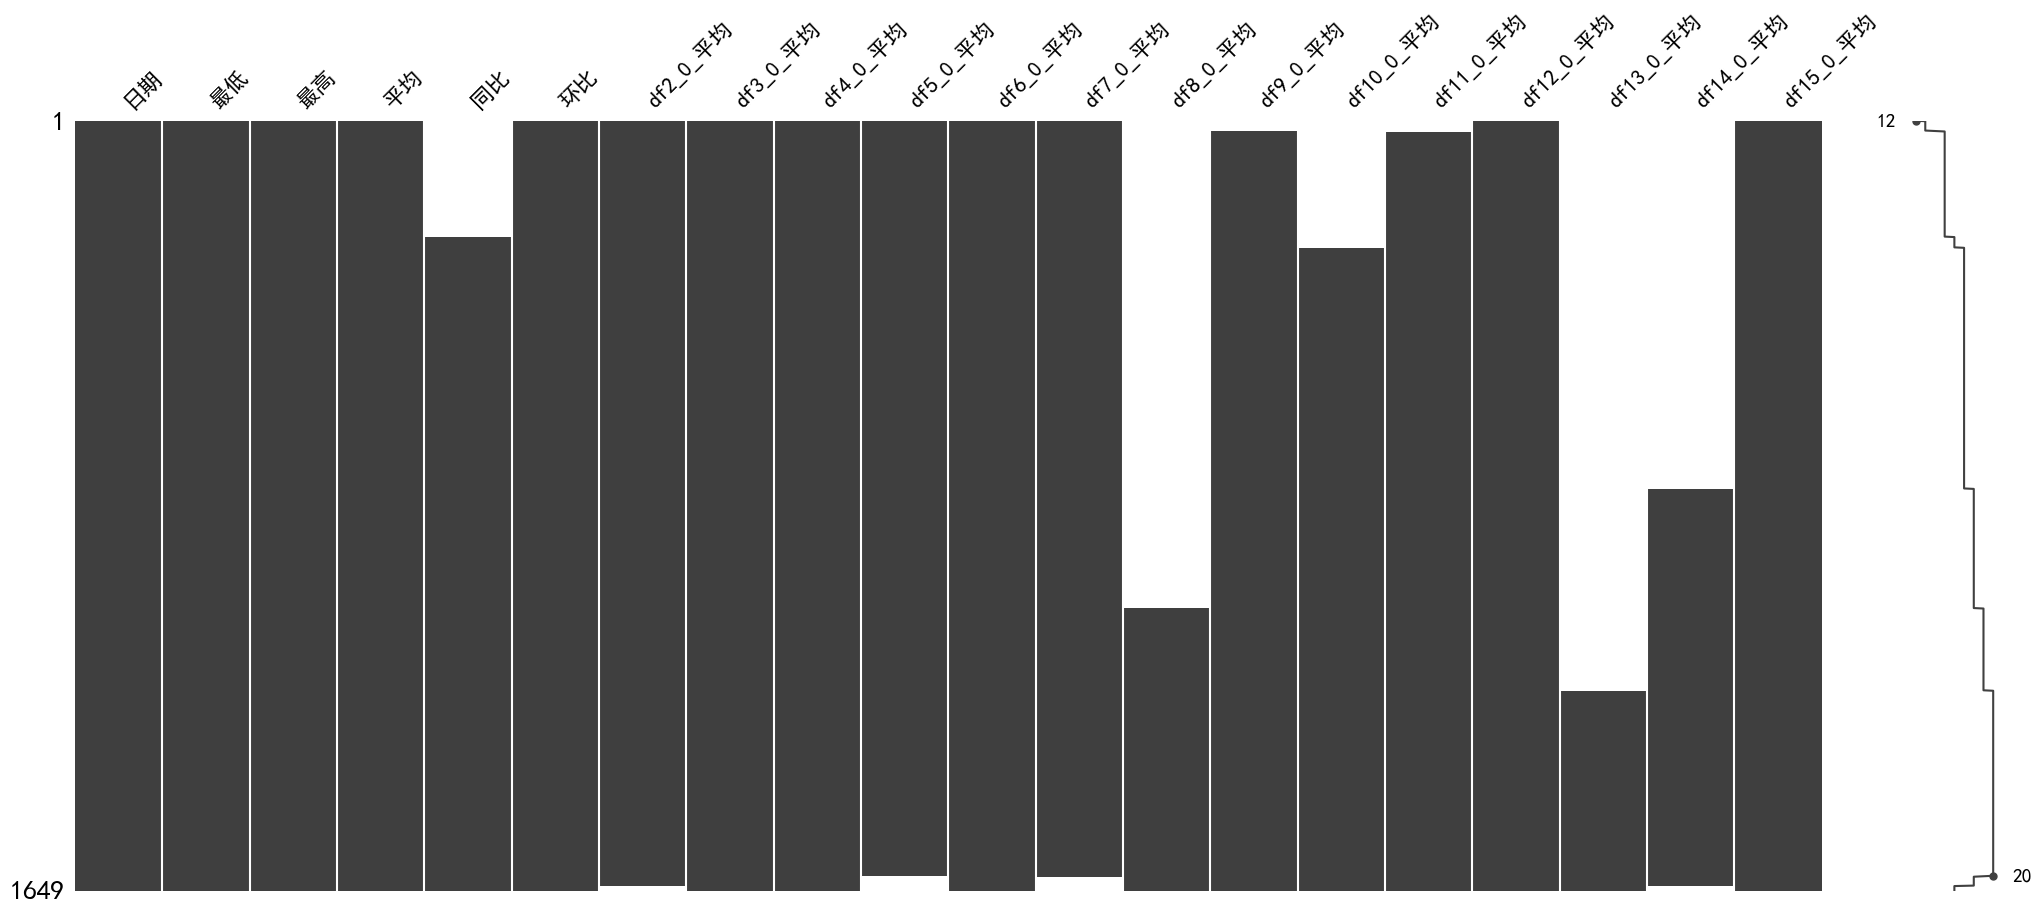

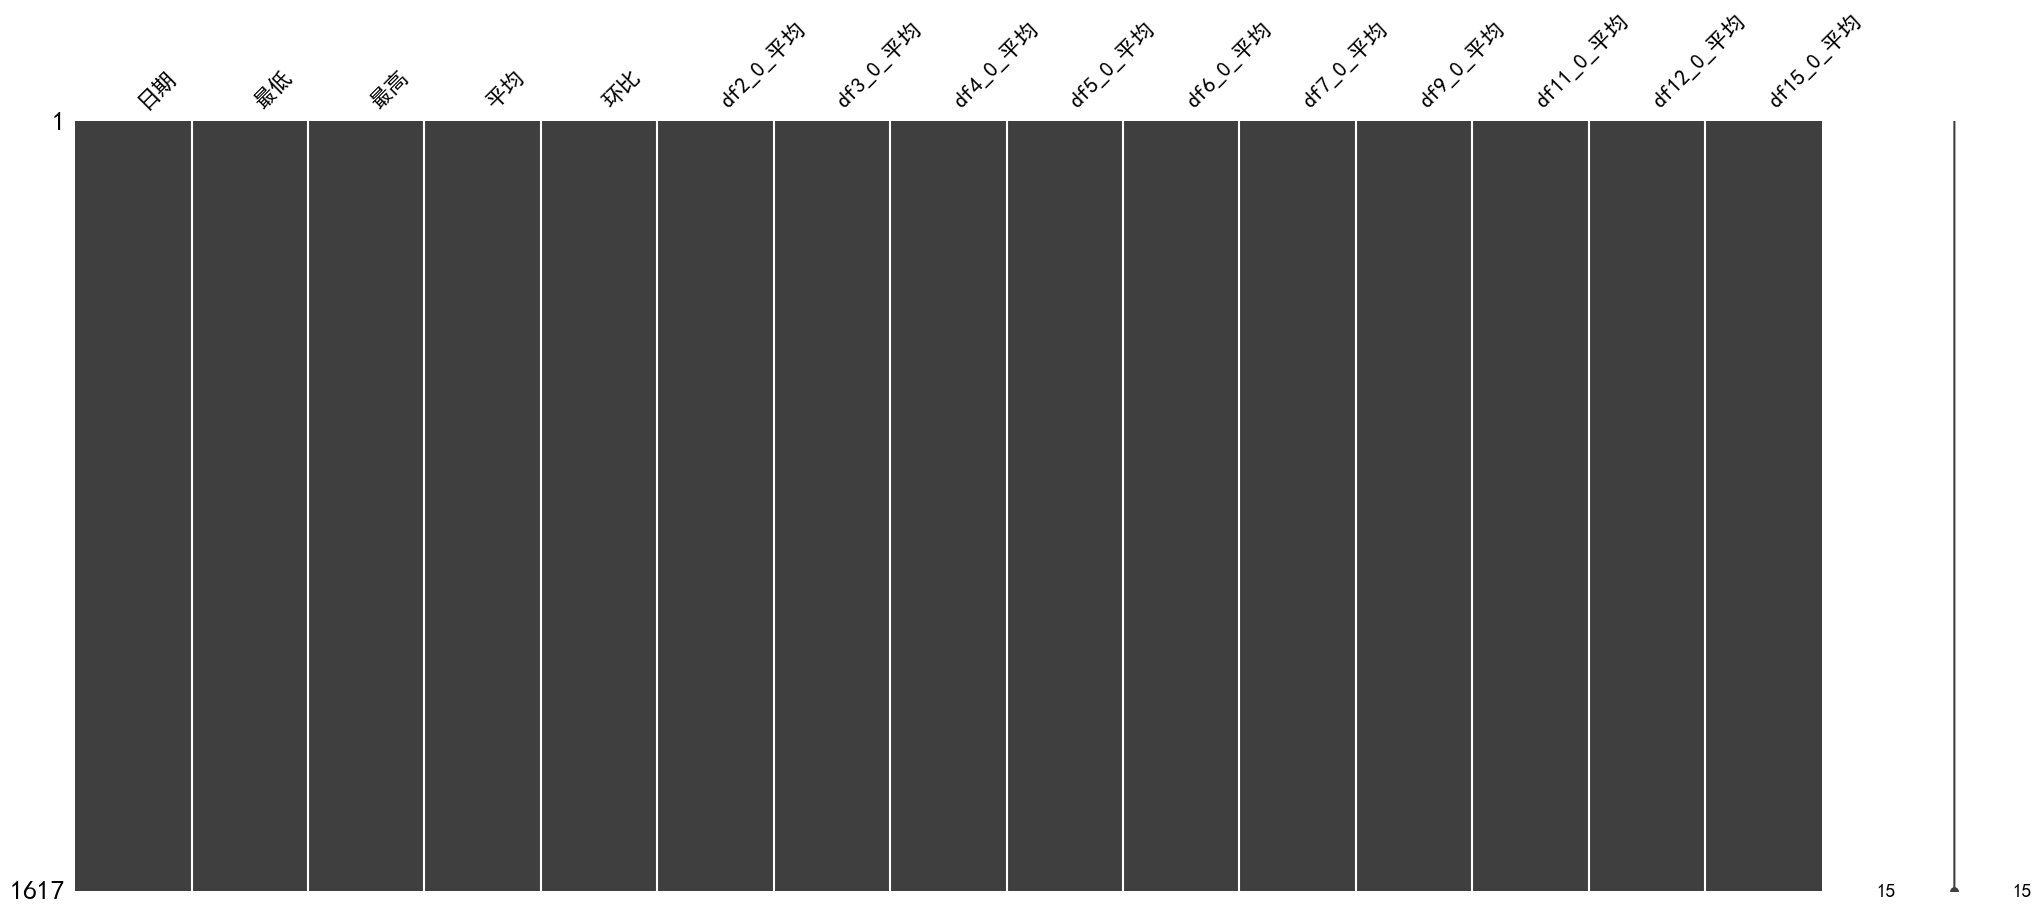

In [83]:
import missingno as msno
# 假设 df 是你的 DataFrame
# threshold 是你指定的阈值，例如 0.5 表示 50%
msno.matrix(df_merge)
# 计算每列的缺失值比例
threshold = 0.1
missing_ratio = df_merge.isnull().mean()

# 选择缺失比例小于等于阈值的列
df_cleaned = df_merge.loc[:, missing_ratio <= threshold]

# df_cleaned 就是删除缺失比例大于阈值的列后的 DataFrame

# 选择2021-07-01之前的数据
df_cleaned = df_cleaned.loc[df_cleaned['日期'] < '2021-06-01',:].fillna(method='ffill').fillna(method='bfill')

msno.matrix(df_cleaned)

In [84]:
df_cleaned.drop(columns=['日期','最低','最高','环比'], inplace=True)
df_cleaned.columns = ['pp价格','月产量','塑编周开工率','生产比例','进口量','注塑周开工率','pp月度开工率','乙烯含税成本','CTO含税成本','丙烯含税成本','pp石化库存']

df_cleaned

,pp价格,月产量,塑编周开工率,生产比例,进口量,注塑周开工率,pp月度开工率,乙烯含税成本,CTO含税成本,丙烯含税成本,pp石化库存
0,10250.0,1227.00,72.0,32.23,261.63,60.0,63.28,6051.84,4810.75,8501.25,94.5
1,10200.0,1227.00,72.0,29.63,261.63,60.0,63.28,6051.84,4810.75,8501.25,94.5
2,10100.0,1227.00,72.0,32.68,261.63,60.0,63.28,6051.84,4810.75,8501.25,96.0
3,9950.0,1227.00,72.0,33.59,261.63,60.0,63.28,6051.84,4810.75,8501.25,96.0
4,9800.0,1227.00,71.0,32.31,261.63,59.0,63.28,6051.84,4810.75,8501.25,96.0
...,...,...,...,...,...,...,...,...,...,...,...
1612,8600.0,2238.11,55.0,33.16,237.70,56.0,61.69,6925.51,7127.50,9006.25,74.0
1613,8580.0,2238.11,55.0,30.59,237.70,56.0,61.69,6926.33,7082.50,8955.75,70.0
1614,8575.0,2238.11,53.0,30.04,237.70,54.0,61.69,6962.80,7082.50,8930.50,68.5
1615,8625.0,2238.11,53.0,29.73,237.70,54.0,61.69,6960.82,7082.50,8905.25,67.0


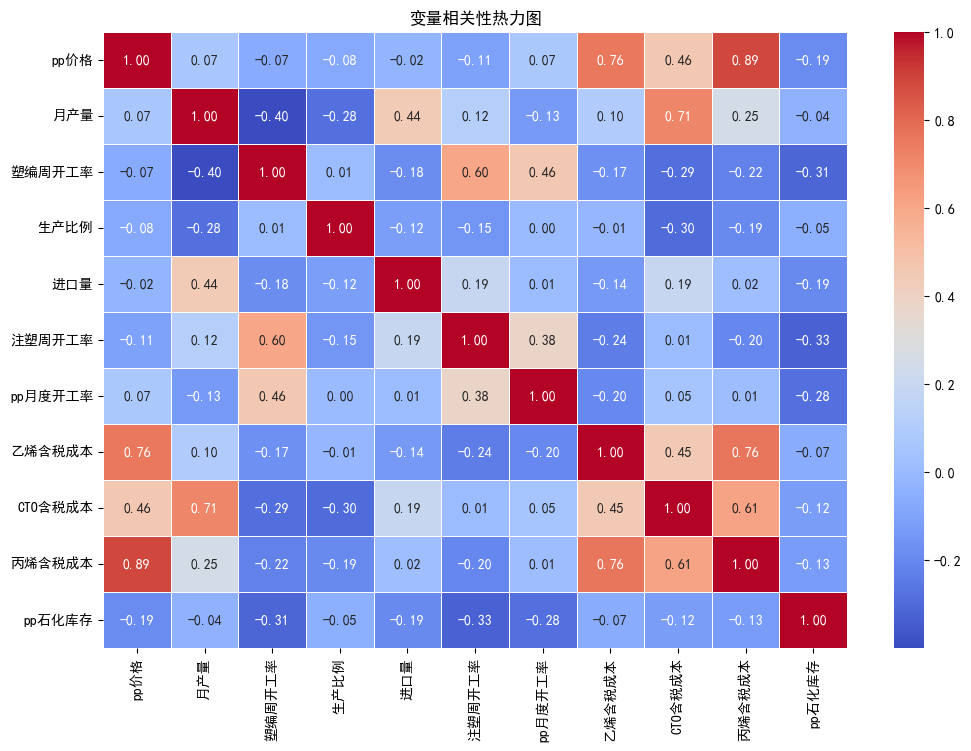

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假设df_cleaned已经加载了数据
# df_cleaned = pd.read_csv('your_data.csv')  # 如果数据在CSV文件中


# 计算相关性矩阵
corr_matrix = df_cleaned.corr()

# 绘制热力图
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('变量相关性热力图')
plt.show()

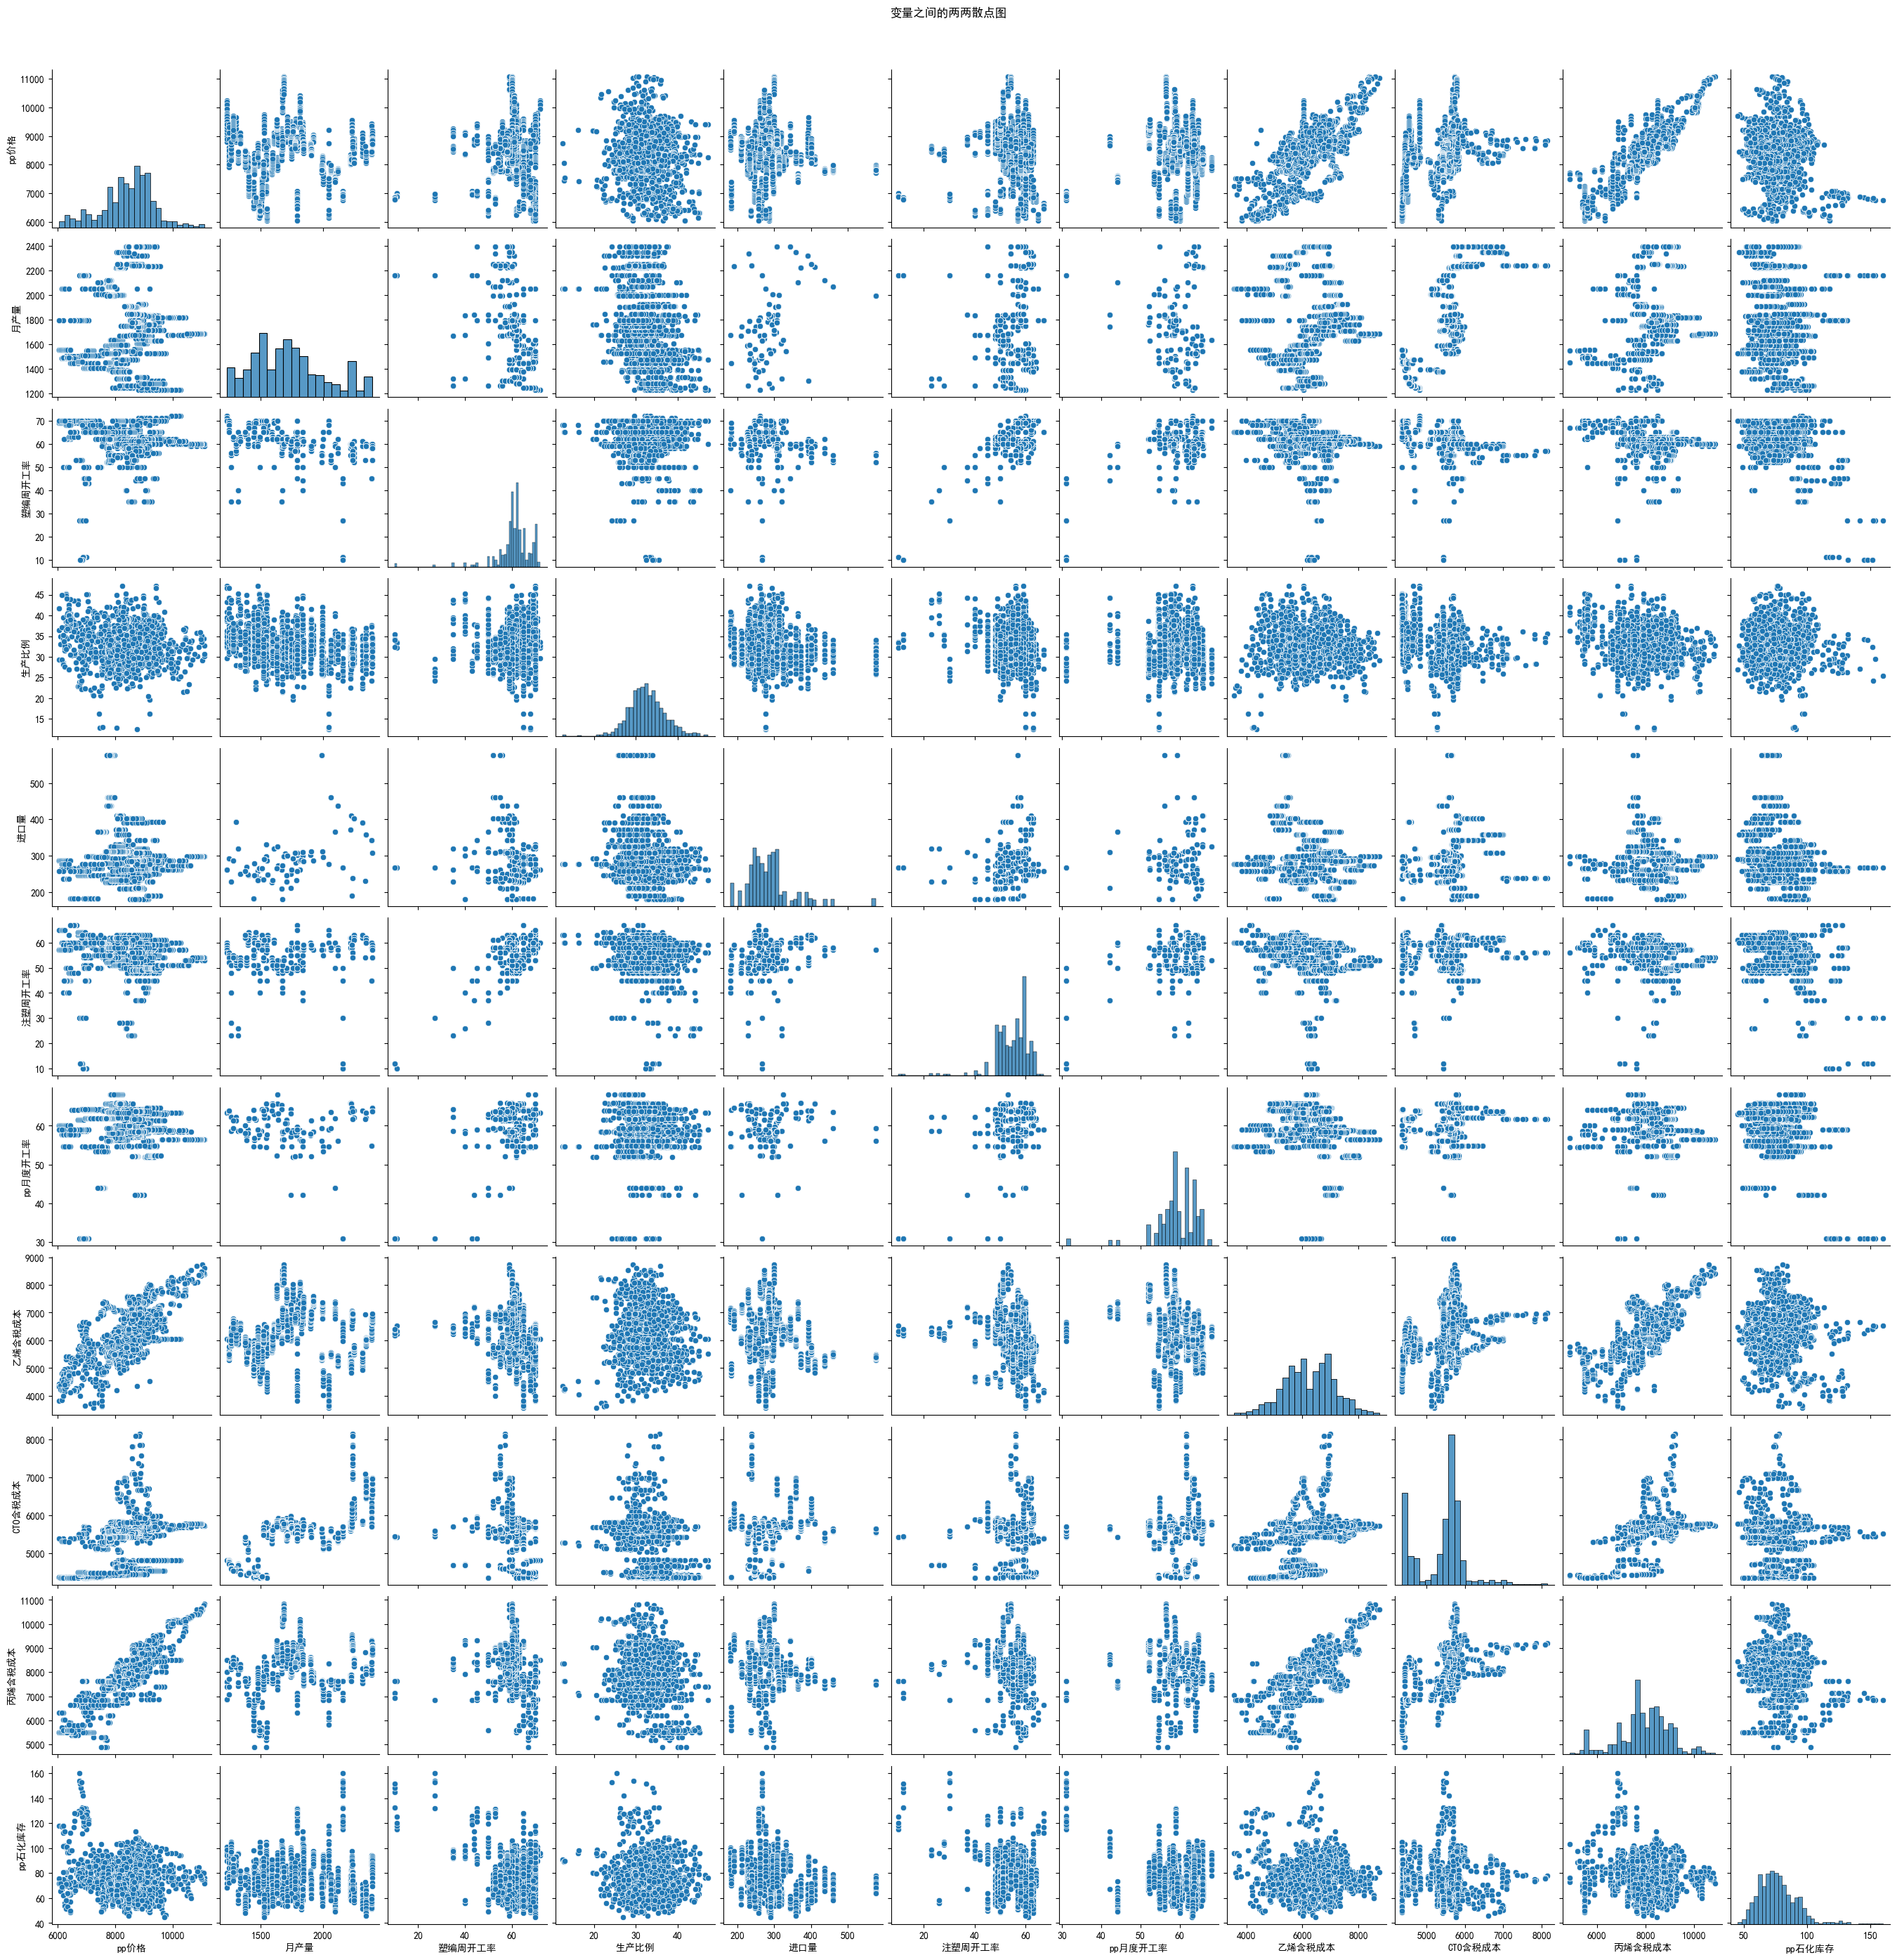

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假设df_cleaned已经加载了数据
# df_cleaned = pd.read_csv('your_data.csv')  # 如果数据在CSV文件中


# 绘制两两散点图
sns.pairplot(df_cleaned)
plt.suptitle('变量之间的两两散点图', y=1.02)
plt.show()

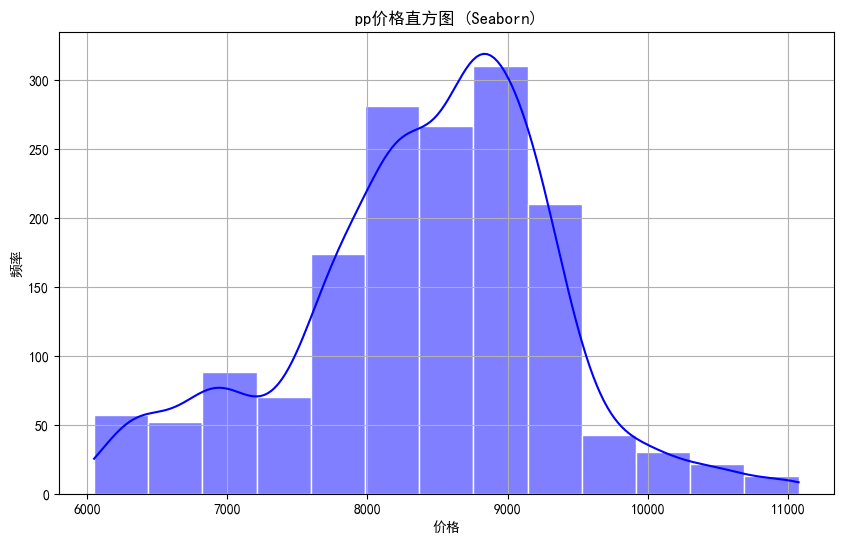

In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假设df_cleaned已经加载了数据
# df_cleaned = pd.read_csv('your_data.csv')  # 如果数据在CSV文件中


# 使用seaborn绘制直方图
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['pp价格'], bins=13, kde=True, color='blue',edgecolor='white')
plt.title('pp价格直方图 (Seaborn)')
plt.xlabel('价格')
plt.ylabel('频率')
plt.grid(True)
plt.show()

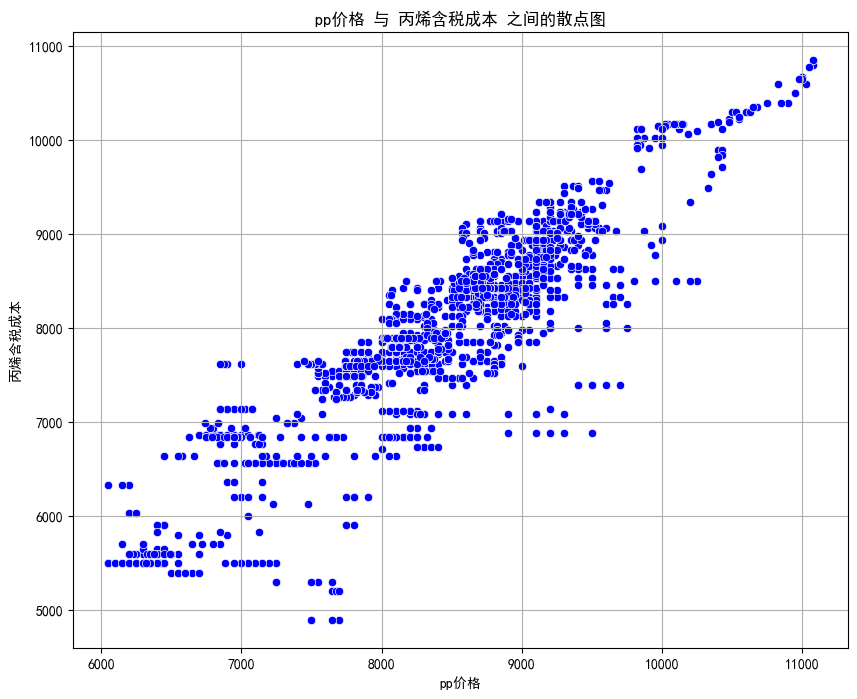

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

# 假设 df_cleaned 已经加载了数据
# df_cleaned = pd.read_csv('your_data.csv')  # 如果数据在CSV文件中

# 指定两个列名
col1 = 'pp价格'  # 第一个变量
col2 = '丙烯含税成本'  # 第二个变量

# 使用 seaborn 绘制散点图
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_cleaned, x=col1, y=col2, color='blue',edgecolor='white')
plt.title(f'{col1} 与 {col2} 之间的散点图')
plt.xlabel(col1)
plt.ylabel(col2)
plt.grid(True)
plt.show()

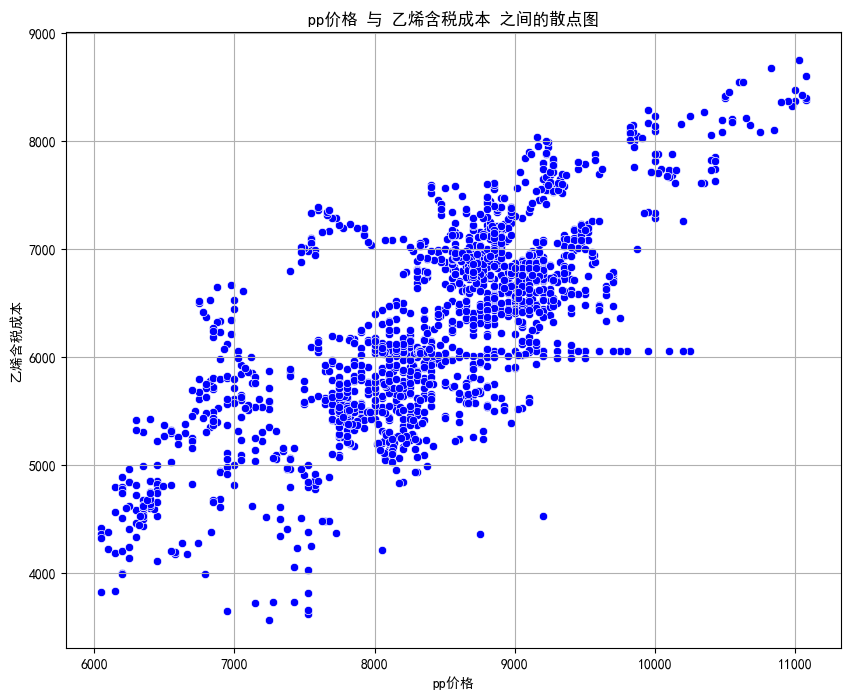

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

# 假设 df_cleaned 已经加载了数据
# df_cleaned = pd.read_csv('your_data.csv')  # 如果数据在CSV文件中

# 指定两个列名
col1 = 'pp价格'  # 第一个变量
col2 = '乙烯含税成本'  # 第二个变量

# 使用 seaborn 绘制散点图
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_cleaned, x=col1, y=col2, color='blue',edgecolor='white')
plt.title(f'{col1} 与 {col2} 之间的散点图')
plt.xlabel(col1)
plt.ylabel(col2)
plt.grid(True)
plt.show()

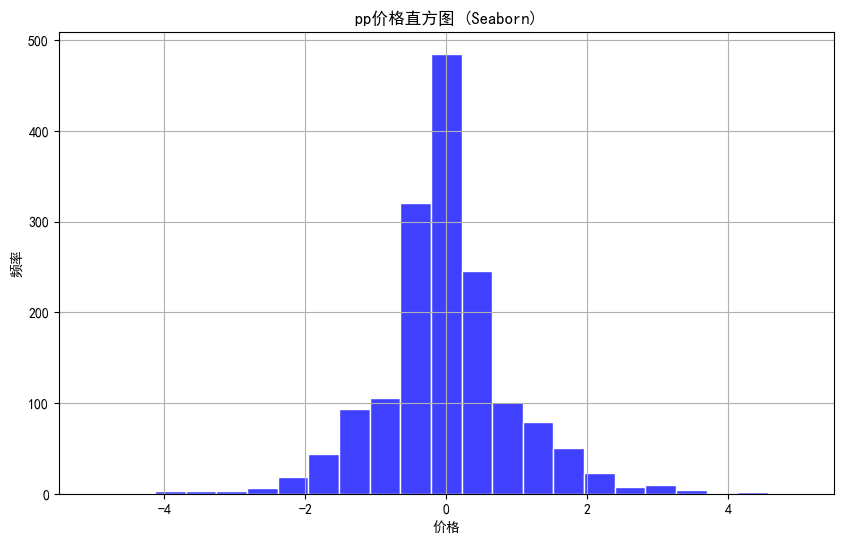

In [128]:
df_cleaned['pp价格变化率'] = df_cleaned['pp价格'].pct_change() * 100

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假设df_cleaned已经加载了数据
# df_cleaned = pd.read_csv('your_data.csv')  # 如果数据在CSV文件中


# 使用seaborn绘制直方图
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['pp价格变化率'], bins=23, kde=False, color='blue',edgecolor='white', binrange=(-5,5))
plt.title('pp价格直方图 (Seaborn)')
plt.xlabel('价格')
plt.ylabel('频率')
plt.grid(True)
plt.show()

In [136]:
df_cleaned['pp价格'].mean()


8410.705009276438